# Анализ данных по продажам игр
        Цель - проанализировать данные из открытых источников о продажах игр
    до 2016 года и спланировать кампанию на 2017. Необходимо выявить определяющие
    успешеность игры закономерности.
    
## Описание данных
    

| Название столбца | Значение |
| --- | --- |
| Name | название игры |
| Platform | платформа |
| Year_of_Release | возраст |
| city | год выпуска |
| Genre | жанр игры |
| NA_sales | продажи в Северной Америке (миллионы проданных копий) |
| EU_sales | продажи в Европе (миллионы проданных копий) |
| JP_sales | продажи в Японии (миллионы проданных копий) |
| Other_sales | продажи в других странах (миллионы проданных копий) |
| Critic_Score | оценка критиков (максимум 100) |
| User_Score | оценка пользователей (максимум 10) |
| Rating | рейтинг от организации ESRB |

        В наборе данных попадается аббревиатура ESRB (Entertainment Software 
    Rating Board) — это ассоциация, определяющая возрастной рейтинг 
    компьютерных игр. ESRB оценивает игровой контент и присваивает ему 
    подходящую возрастную категорию, например, «Для взрослых», «Для детей 
    младшего возраста» или «Для подростков».
    
        Данные за 2016 год. Могут быть неполными.
## План работы
### Шаг 1. Изучить общую информацию
### Шаг 2. Подготовить данные
### Шаг 3. Провести исследовательский анализ данных
### Шаг 4. Составить портрет пользователя каждого региона
### Шаг 5. Проверить гипотезы: 
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action и Sports разные.
### Шаг 6. Итоговый вывод

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st

## Шаг 1. Изучение общей информации

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


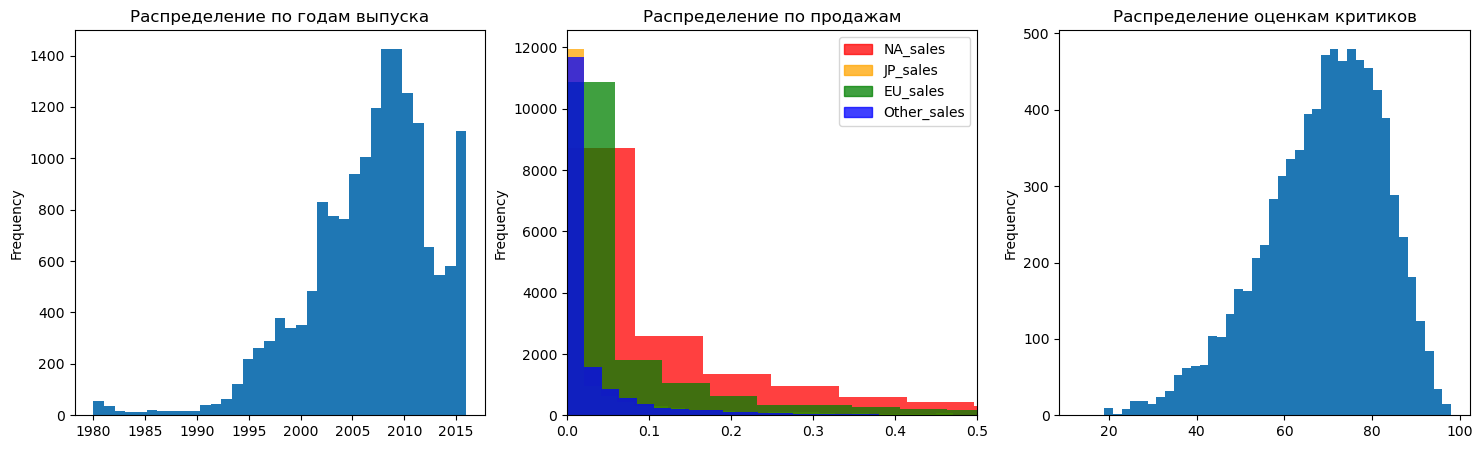

In [5]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1, title='Распределение по годам выпуска')
data['Year_of_Release'].plot(kind='hist', 
                             bins = 35)
plt.subplot(1, 3, 2, xlim=(0, 0.5), title='Распределение по продажам')
data['NA_sales'].plot(kind='hist', 
                      bins=500, 
                      color='r', 
                      alpha=0.75)
data['JP_sales'].plot(kind='hist', 
                      bins=500, 
                      color='orange', 
                      alpha=0.75)
data['EU_sales'].plot(kind='hist', 
                      bins=500, 
                      color='g', 
                      alpha=0.75)
data['Other_sales'].plot(kind='hist', 
                         bins=500, 
                         color='b', 
                         alpha=0.75);
colors = {'NA_sales':'red', 'JP_sales':'orange', 'EU_sales': 'green', 'Other_sales': 'blue'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label], alpha=0.75) for label in labels]
plt.legend(handles, labels)
plt.subplot(1, 3, 3, title='Распределение оценкам критиков')
data['Critic_Score'].plot(kind='hist', 
                          bins=43);

        Были считаны данные из csv-файла, они записаны в переменную data. 
    Всего в таблице 16715 строк. Необходимо заменить названия столбцов, 
    привести к нижнему регистру. В столбце Year_of_Release необходимо 
    изменить тип данных на int, в столбце User_Score необходимо изменить тип
    данных на float. Также скорее всего в столбце Critic_Score нужно заменить
    тип данных на int, перед этим проверить все ли оценки являются целыми
    числами.
        Построены гистограммы распределения для всего датафрейма.

## Шаг 2. Подготовка данных

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

### Поиск и обработка пропусков

In [8]:
display(data.isna().sum())
data[data['name'].isna()]

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
total_sales           0
dtype: int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


        В данных встречается две строки, в которых не определено ни название игры, ни жанра, также не указан ни один из
    рейтингов, поэтому решено, что они не несут в себе никакой полезной информации, в следствии чего принято решение
    удалить эти строки. Также замечены пропуски в столбце 'year_of_release', предугадать и заменить год выпуска игры 
    невозможно, к тому же пропусков в этом столбце мало, удаление строк с пропусками в этом столбце никак не повлият на
    ход исследования

In [9]:
data = data[~data['name'].isna()]
data = data[~data['year_of_release'].isna()]
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
total_sales           0
dtype: int64

        Остались пропуски в следующих столбцах: critic_score, user_score, rating. В этих столбцах пропусков слишком много, 
    необходимо выяснить с чем они связаны.

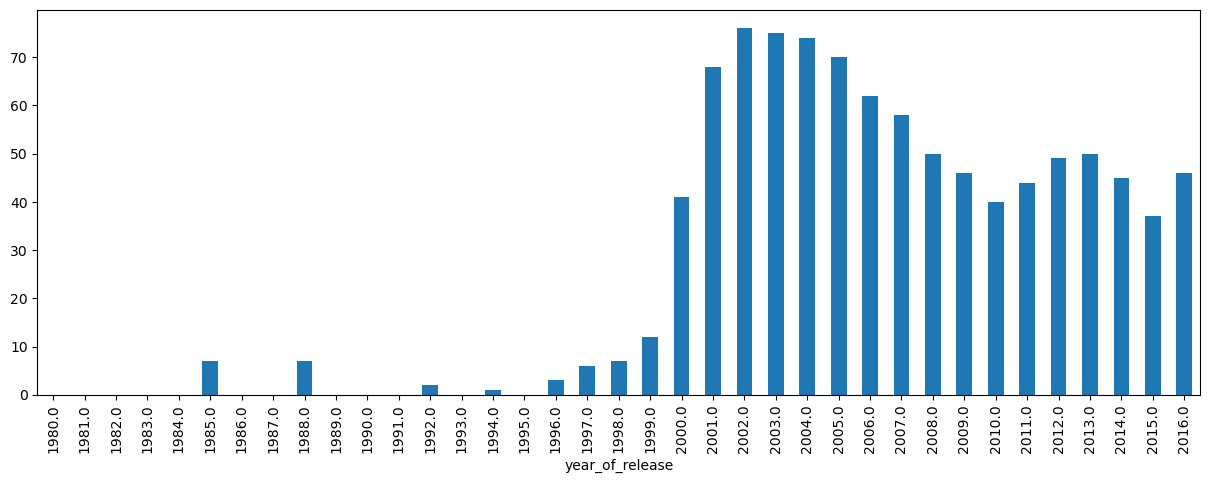

In [10]:
#Процентное соотношение строк, в которых не было пропущено значение в столбце critic_score по годам
((((data.groupby('year_of_release')['critic_score'].count() / data.groupby('year_of_release')['name'].count())*100).round())
    .plot(kind='bar', figsize=(15, 5)));

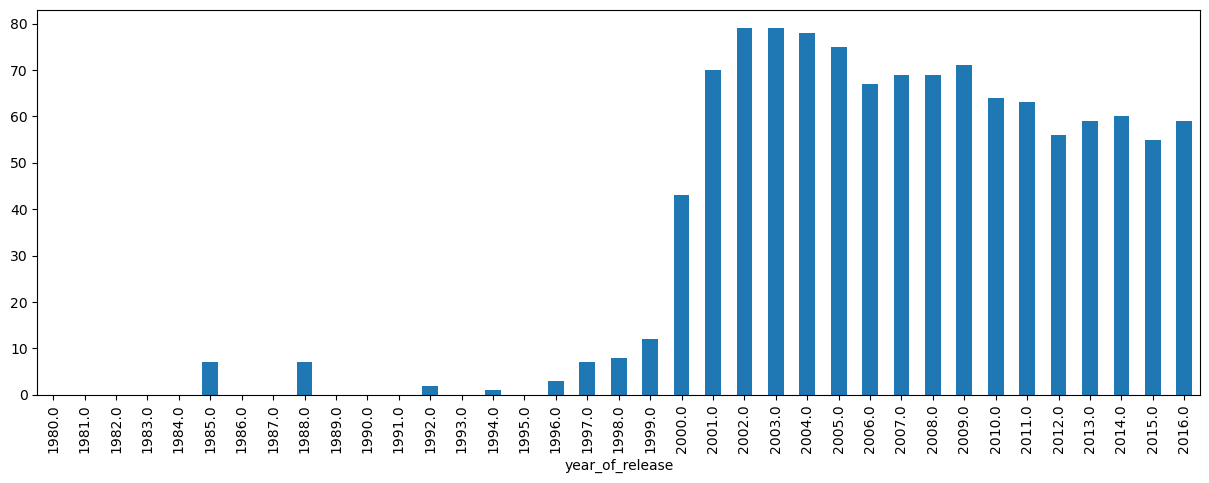

In [11]:
#Процентное соотношение строк, в которых не было пропущено значение в столбце user_score по годам
((((data.groupby('year_of_release')['user_score'].count() / data.groupby('year_of_release')['name'].count())*100).round())
    .plot(kind='bar', figsize=(15, 5)));

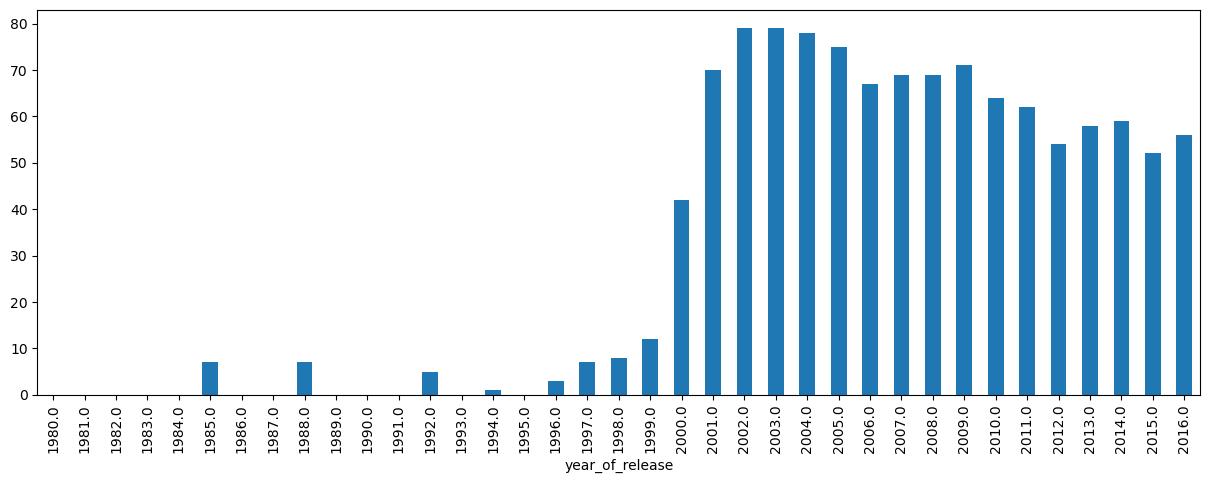

In [12]:
#Процентное соотношение строк, в которых не было пропущено значение в столбце rating по годам
((((data.groupby('year_of_release')['rating'].count() / data.groupby('year_of_release')['name'].count())*100).round())
    .plot(kind='bar', figsize=(15, 5)));

In [13]:
omissions_share = 1 - ((data[data['year_of_release'] > 2000]['user_score'].count() / 
                      data[data['year_of_release'] > 2000]['name'].count()))

print(f'Процент пропусков в столбце "user_score" за период 2001-2016: {omissions_share:0.1%}')

Процент пропусков в столбце "user_score" за период 2001-2016: 32.1%


        Были построены графики процентного соотношения пропусков в соответствующих столбцах по годам. Заметим, что во всех
    трех столбцах с 2001 года пропусков становится значительно меньше. Например, в столбце "user_score" в период 2001-2016
    32.1% значений пропущено. Скорее всего это связано с тем, что в период до 2001 года игры не были так популярны, 
    вследствие редко составлялись какие-либо рейтинги.
    
        Избавиться от этих пропусков никак не выйдет, так как предугадать оценку нельзя.

In [14]:
print(f'Количество дубликатов в таблице: {data.duplicated().sum()}')

Количество дубликатов в таблице: 0


In [15]:
data[data[['name', 'platform', 'year_of_release', 'genre']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E,0.01


In [16]:
data[(data['name'] == 'Madden NFL 13') & (data['platform'] == 'PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


        Был замечен один дубликат, значения в столбцах оценок совпадают, а в столбцах количества продаж нет. Чтоб избавиться
    от дубликата можно либо сложить количество продаж, либо просто удалить одну из строк. Во второй строке количество продаж
    во всех регионах, кроме Европы равно 0, а в Европе 0.01, это выглядит как ошибка при заполнении таблицы, скорее всего
    это количество продаж учитывать не стоит, поэтому принято решение удалить строку с явно неверными значениями.

In [17]:
data = data[~data[['name', 'platform', 'year_of_release', 'genre']].duplicated()]

### Преобразование типов данных 

        Так как в столбце user_score встречается значение "tbd", которое означает "to be determined", то есть значение не
    определенно, то принято решение заменить значение "tbd" на None для того, чтобы было возможно заменить строковой тип
    на тип float. В столбцах 'year_of_release' и 'critic_score' не были заменены пропуски, из-за этого невозможно заменить
    тип данных на int.

In [18]:
data['user_score'] = data['user_score'].replace(['tbd'], None)
data['user_score'] = data['user_score'].astype(float)

        Найдены пропуски в следующих столбцах: 'name', 'year_of_release', 'critic_score', 'user_score' и 'rating'. Так 
    как пропусков в столбцах 'name' и 'year_of_release' немного и удаление строк с пропусками в этих столбцах не повлияет
    на ход исследования, было принято удалить строки с пропусками в этих столбцах. Занить пропуски в оставшихся столбцах не
    получилось, решено их оставить. Скорее всего эти пропуски связаны с непопулярность игр в период до 2001 года, из-за чего
    у игр в этот период отсутствовали оценки критиков и пользователей, а также рейтинги ESRB, что приводило к большому
    количеству пропусков в столбцах. 
        В столбце 'user_score' значение 'tbd' было заменено на значение None для замены типа данных на тип int.

## Шаг 3. Исследовательский анализ данных
### Анализ актуальности периода выпуска игр

In [19]:
data.groupby('year_of_release')['name'].count()

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     652
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

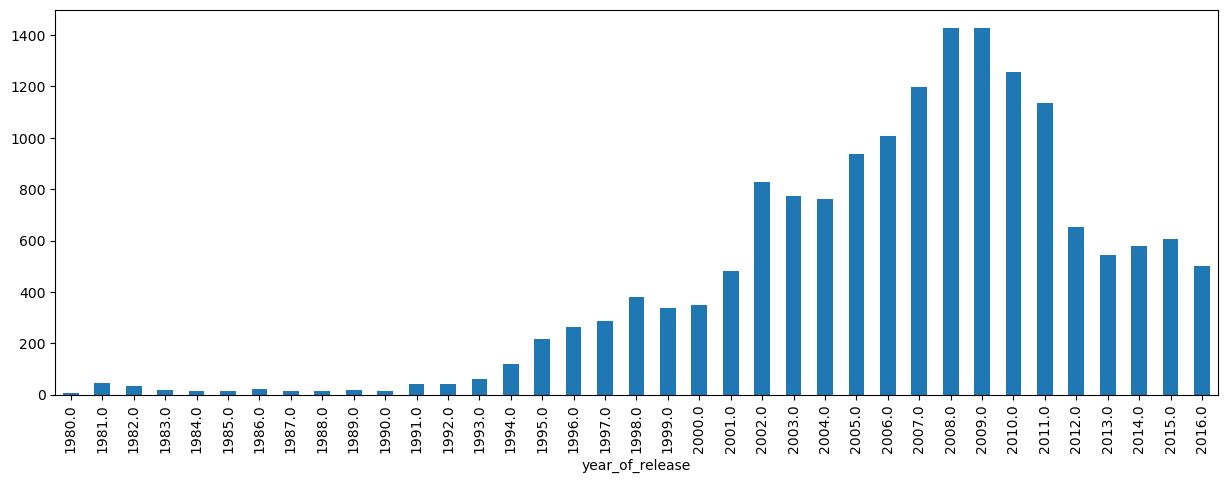

In [20]:
data.groupby('year_of_release')['name'].count().plot(kind='bar', figsize=(15, 5));

        По графику видно, что основное количество игр выпускали в период 2001-2016. С учетом предыдущего анализа пропусков
    в столбцах, где было выявлено, что у большинства игр в период до 2001 большое количество пропусков в столбцах с 
    оценками и рейтингами, можно сделать вывод, что для анализа не важны игры до 2001.

### Анализ платформ по продажам 

platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       28.35
SAT       33.59
PSV       53.81
WiiU      82.19
2600      86.48
XOne     159.32
GC       196.73
SNES     200.04
N64      218.01
NES      251.05
XB       251.57
GB       254.43
PC       255.76
3DS      257.81
PSP      289.53
GBA      312.88
PS4      314.14
PS       727.58
DS       802.78
Wii      891.18
PS3      931.33
X360     961.24
PS2     1233.56
Name: total_sales, dtype: float64

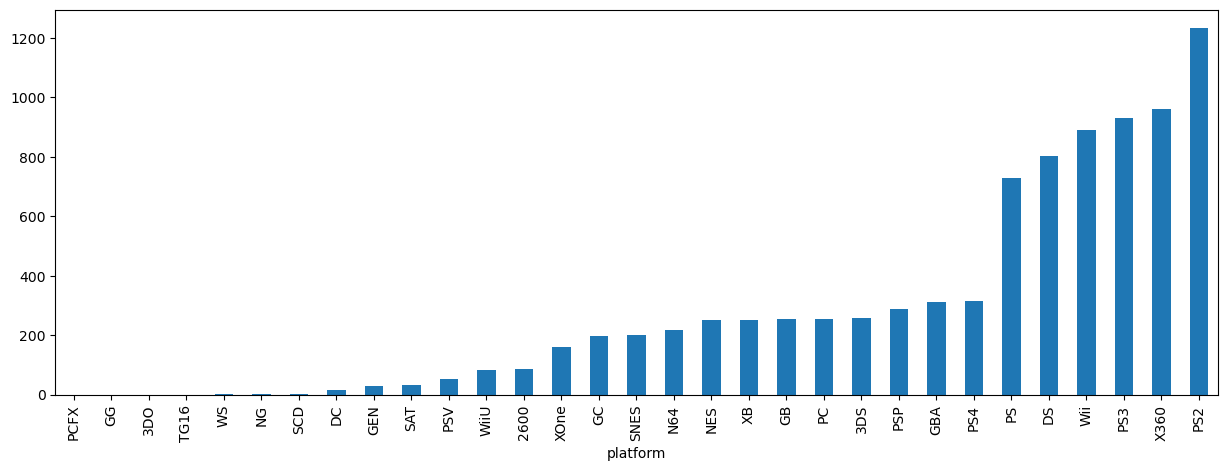

In [21]:
data.groupby('platform')['total_sales'].sum().sort_values().plot(kind='bar', figsize=(15, 5));
data.groupby('platform')['total_sales'].sum().sort_values()

    На графике явно выделяются 6 платформ с наибольшим количеством продаж: PS, DS, Wii, PS3, X360, PS2. 

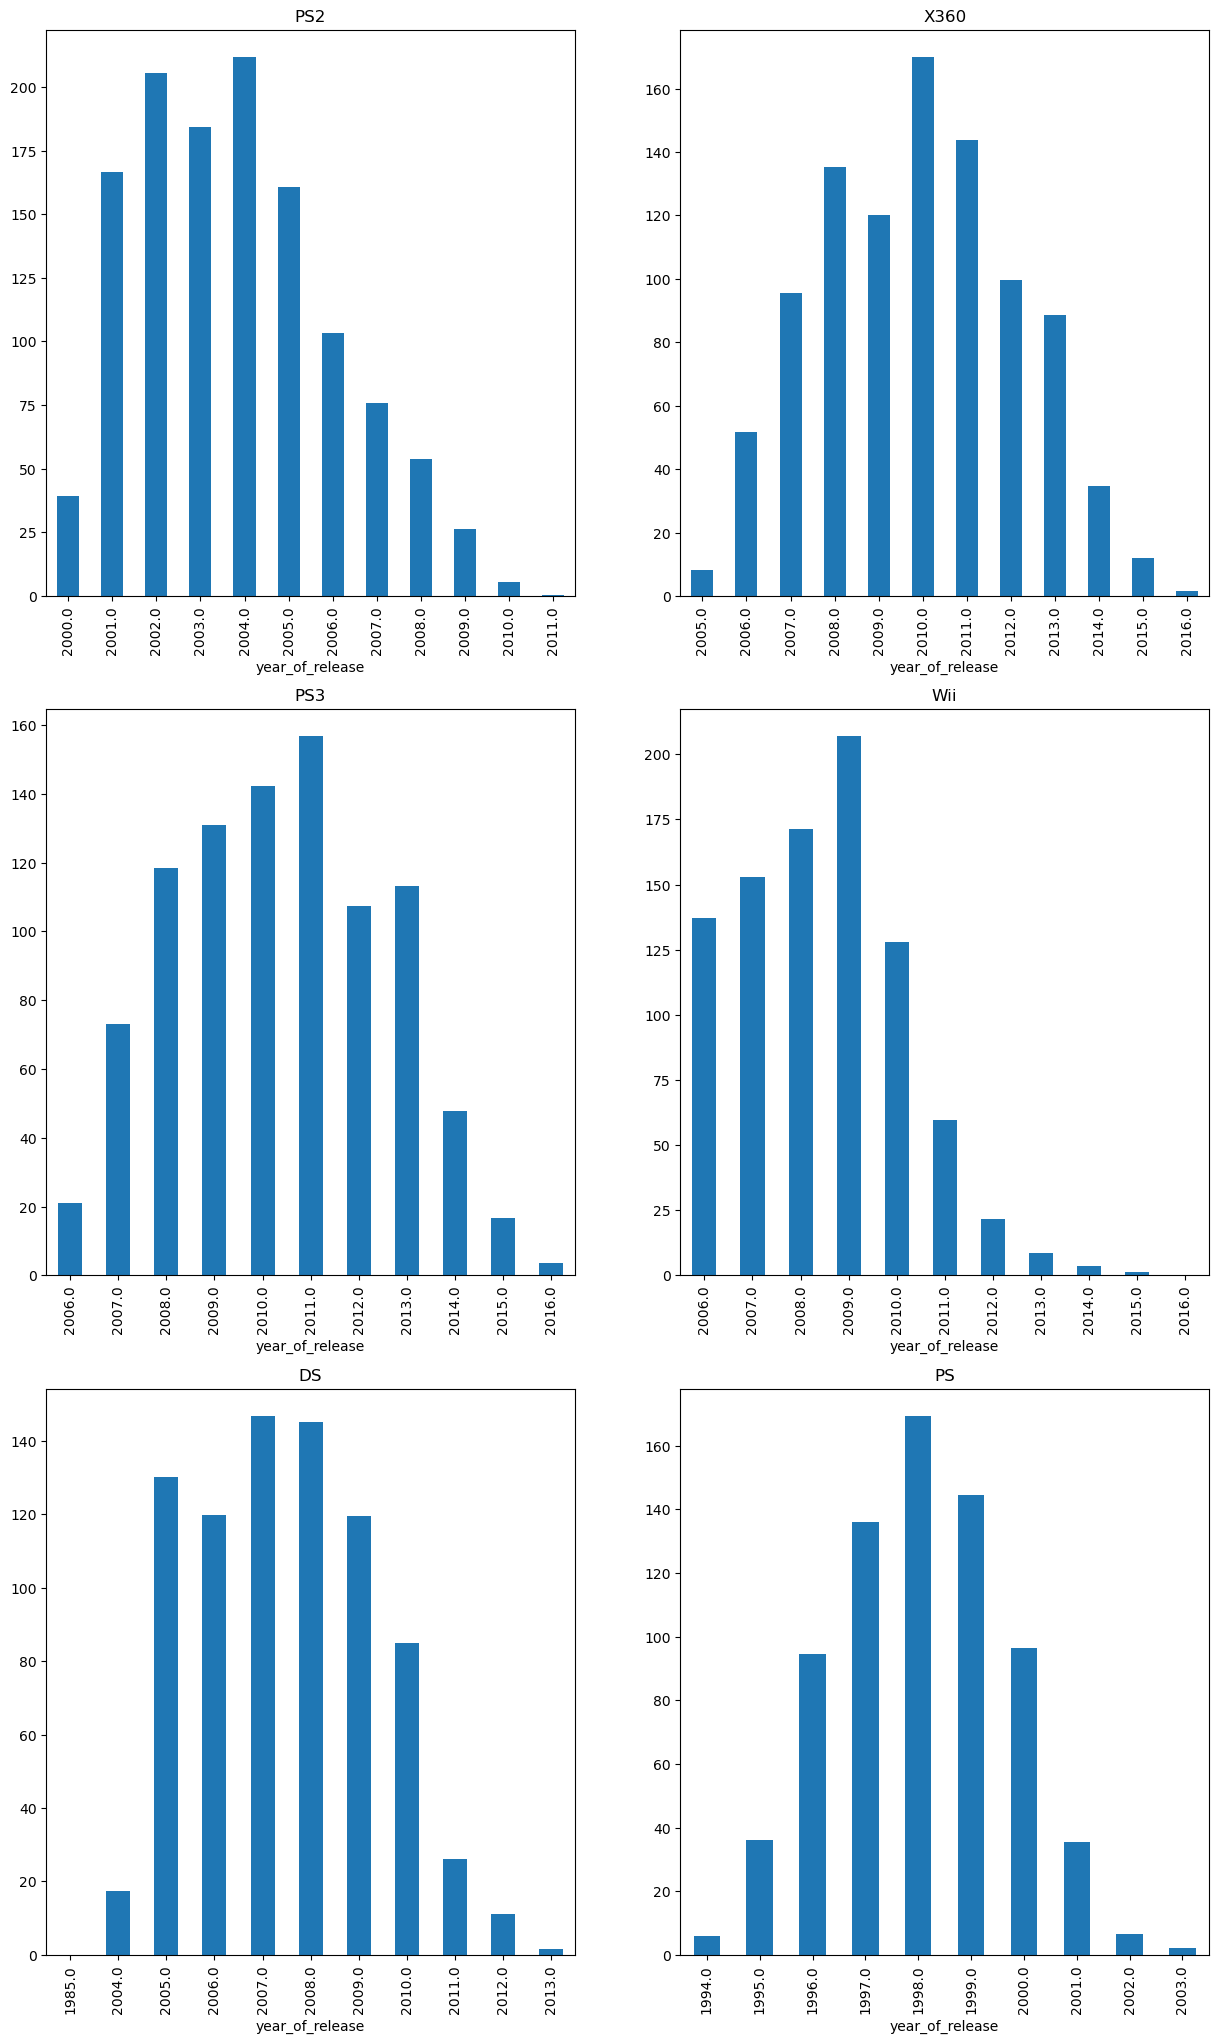

In [22]:
most_popular_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
for i in range(6):
    plt.subplot(3, 2, i+1)
    (data[data['platform'] == most_popular_platforms[i]]
     .groupby('year_of_release')['total_sales']
     .sum()
     .plot(kind='bar', figsize=(15, 25), title=most_popular_platforms[i]))

        После построения графиков распределения продаж по годам можно сделать вывод, что характерный срок для появления
    новой и исчезновения старой платформ 5-6 лет. Рассмотрим данное явление на линейке PS.

In [23]:
height_ps3 = []
height_ps2 = []
height_ps = []
for year in [i for i in range(1994, 2017)]:
    try:
        height_ps3.append(data[data['platform'] == 'PS3'].groupby('year_of_release')['total_sales'].sum()[year])
    except:
        height_ps3.append(0)
    try:
        height_ps2.append(data[data['platform'] == 'PS2'].groupby('year_of_release')['total_sales'].sum()[year])
    except:
        height_ps2.append(0)
    try:
        height_ps.append(data[data['platform'] == 'PS'].groupby('year_of_release')['total_sales'].sum()[year])
    except:
        height_ps.append(0)

<BarContainer object of 23 artists>

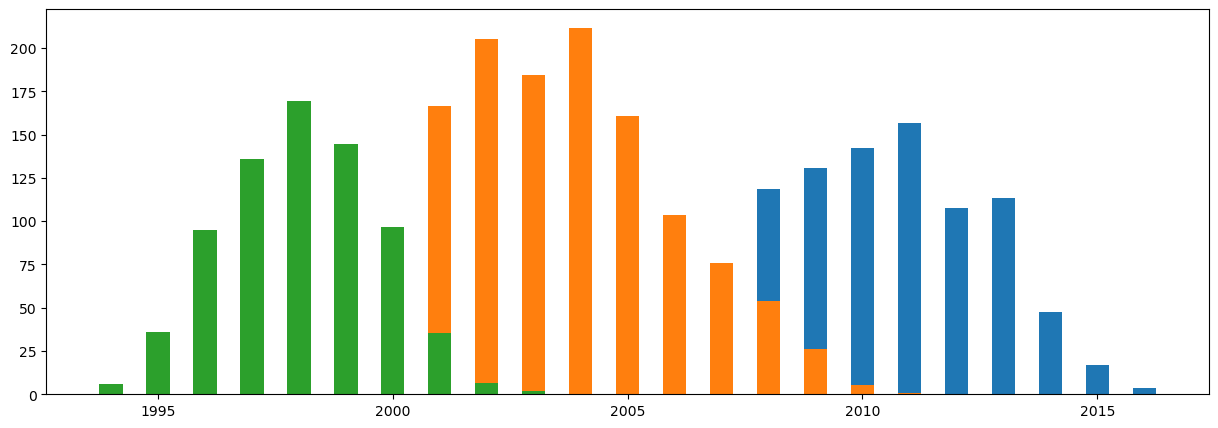

In [24]:
plt.figure(figsize=(15, 5))
plt.bar([i for i in range(1994, 2017)], height_ps3, width=0.5)
plt.bar([i for i in range(1994, 2017)], height_ps2, width=0.5)
plt.bar([i for i in range(1994, 2017)], height_ps, width=0.5)

        На графике отчетливо видно, что время "жизни" одной платформы около 5-6 лет, после этого ее заменяет более новая
    платформа.
        Исходя из этого можно сделать вывод, что для прогноза на следующий год, актуальным периодом можно считать последние
    6 лет. Поэтому игры, которые были выпущены в период до 2012 года необходимо удалить. 
### Анализ данных за актуальный период

In [25]:
data_pc = data
data = data[data['year_of_release'] > 2011]
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 2885 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2885 non-null   object 
 1   platform         2885 non-null   object 
 2   year_of_release  2885 non-null   float64
 3   genre            2885 non-null   object 
 4   na_sales         2885 non-null   float64
 5   eu_sales         2885 non-null   float64
 6   jp_sales         2885 non-null   float64
 7   other_sales      2885 non-null   float64
 8   critic_score     1311 non-null   float64
 9   user_score       1530 non-null   float64
 10  rating           1610 non-null   object 
 11  total_sales      2885 non-null   float64
dtypes: float64(8), object(4)
memory usage: 293.0+ KB


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1574
user_score         1355
rating             1275
total_sales           0
dtype: int64

#### Анализ потенциально прибыльных платформ

platform
PSP      11.19
DS       12.55
Wii      35.37
PSV      49.18
PC       62.65
WiiU     82.19
XOne    159.32
3DS     194.61
X360    236.54
PS3     288.78
PS4     314.14
Name: total_sales, dtype: float64

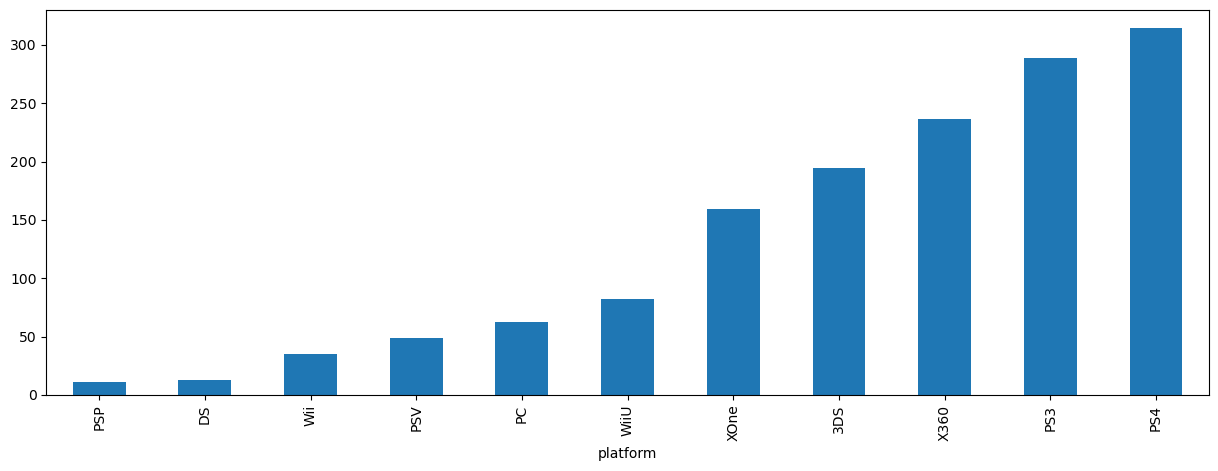

In [26]:
data.groupby('platform')['total_sales'].sum().sort_values().plot(kind='bar', figsize=(15, 5));
data.groupby('platform')['total_sales'].sum().sort_values()

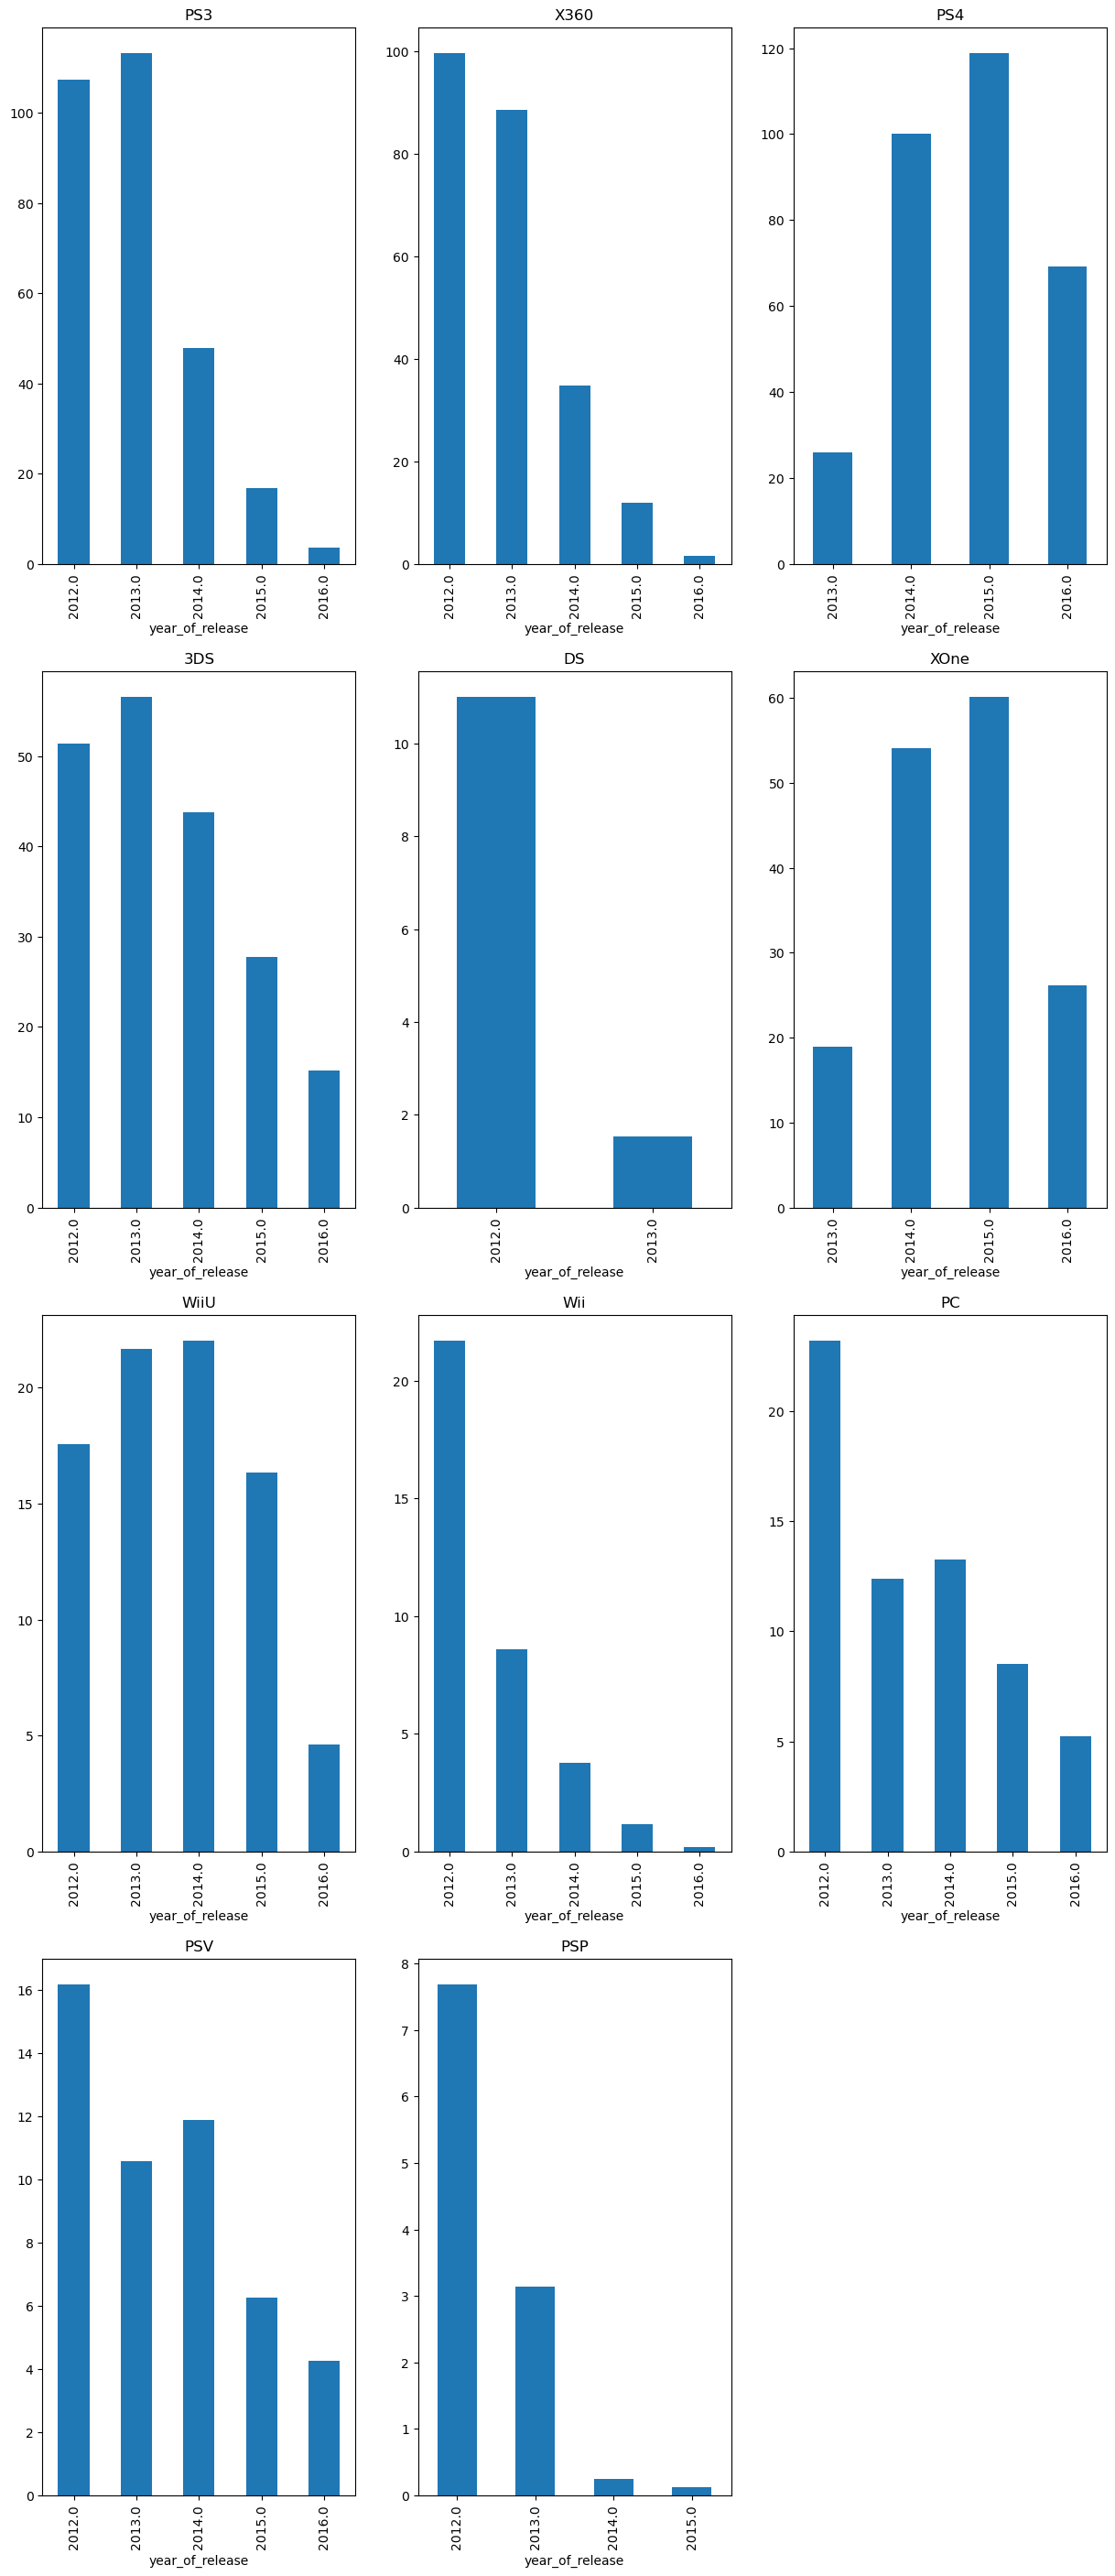

In [27]:
for i in range(len(data['platform'].unique())):
    plt.subplot(4, 3, i+1)
    (data[data['platform'] == data['platform'].unique()[i]]
     .groupby('year_of_release')['total_sales']
     .sum()
     .plot(kind='bar', figsize=(15, 35), title=data['platform'].unique()[i]))

count    24.000000
mean     10.653750
std       7.776492
min       2.850000
25%       4.720000
50%       9.060000
75%      12.532500
max      35.030000
Name: total_sales, dtype: float64

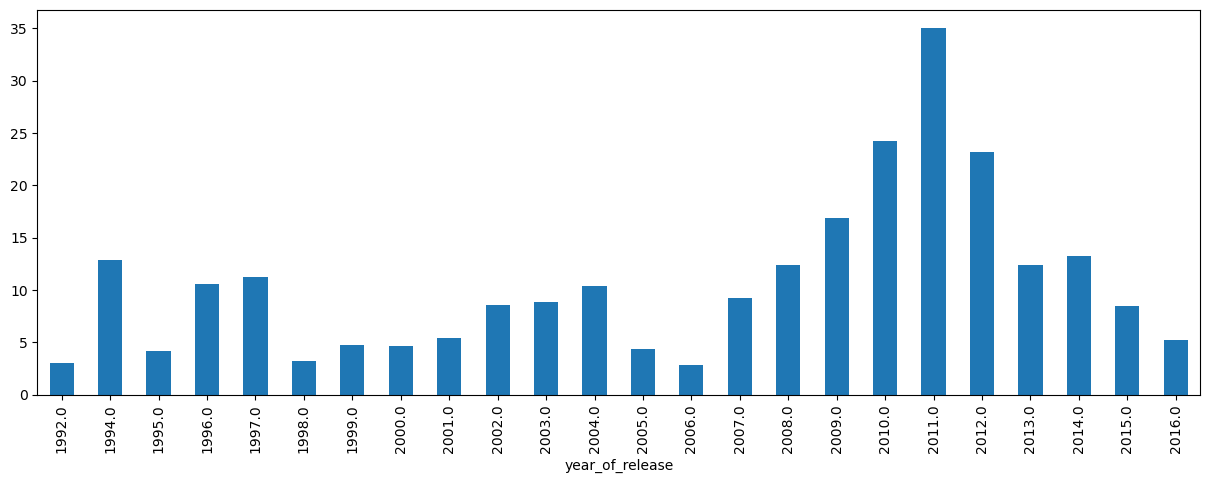

In [28]:
data_pc = data_pc[data_pc['platform'] == 'PC']
data_pc = data_pc[data_pc['year_of_release'] >= 1992]
data_pc.groupby('year_of_release')['total_sales'].sum().plot(kind='bar', figsize=(15, 5))
data_pc.groupby('year_of_release')['total_sales'].sum().describe()

        Среди всех платформ выделяются несколько линеек, которые зависят друг от друга: 
    - PS3 и PS4 
    - PSV и PSP
    - XOne и X360
    - 3DC и DC
    - WiiU, Wii
    - PC является универсальной платформой и популярен во все года, что можно заметить на графике, с 1992 года игры на 
    данную платформу продаются в среднем по 9-10 миллионов копий в год, поэтому эта платформа является потенциально 
    прибыльной.
        Рассмотрим все линейки платформ и построим графики. 

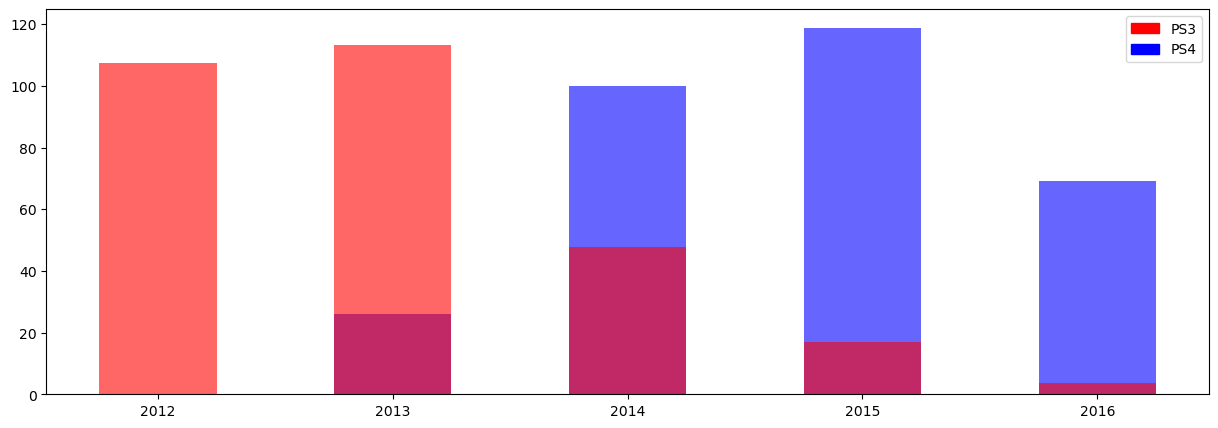

In [29]:
height_ps3 = []
height_ps4 = []
for year in [i for i in range(2012, 2017)]:
    try:
        height_ps3.append(data[data['platform'] == 'PS3'].groupby('year_of_release')['total_sales'].sum()[year])
    except:
        height_ps3.append(0)
    try:
        height_ps4.append(data[data['platform'] == 'PS4'].groupby('year_of_release')['total_sales'].sum()[year])
    except:
        height_ps4.append(0)
plt.figure(figsize=(15, 5))
plt.bar([i for i in range(2012, 2017)], height_ps4, width=0.5, color='b', alpha=0.6)
plt.bar([i for i in range(2012, 2017)], height_ps3, width=0.5, color='r', alpha=0.6)
colors = {'PS3':'red', 'PS4':'blue'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels);

        Заметно падение продаж игр на платформе PS3 после выхода PS4. Поэтому PS3 не является потенциально прибыльной, в
    отличие от PS4, более 60 миллионов копий игр продано для этой платформы в 2016 году.

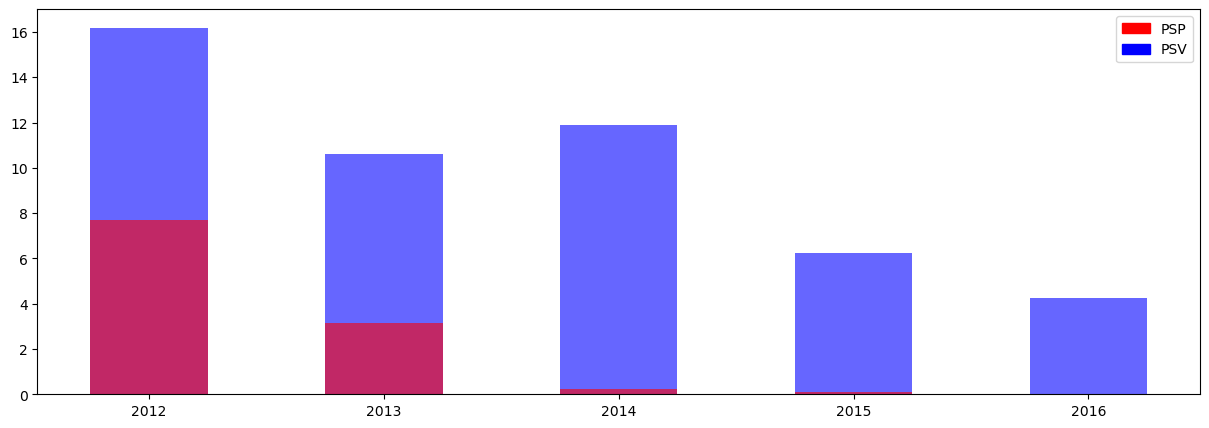

In [30]:
height_psv = []
height_psp = []
for year in [i for i in range(2012, 2017)]:
    try:
        height_psv.append(data[data['platform'] == 'PSV'].groupby('year_of_release')['total_sales'].sum()[year])
    except:
        height_psv.append(0)
    try:
        height_psp.append(data[data['platform'] == 'PSP'].groupby('year_of_release')['total_sales'].sum()[year])
    except:
        height_psp.append(0)
plt.figure(figsize=(15, 5))
plt.bar([i for i in range(2012, 2017)], height_psv, width=0.5, color='b', alpha=0.6)
plt.bar([i for i in range(2012, 2017)], height_psp, width=0.5, color='r', alpha=0.6)
colors = {'PSP':'red', 'PSV':'blue'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels);

        Аналогичная ситуация с PSP, после появления нового поколения платформы, заметно снижение продаж, поэтому назвать
    PSP потенциально прибыльной нельзя, одна продажи на PSV снижаются в течении трех лет, поэтому и эту платформу нельзя
    назвать потенциально прибыльной. 

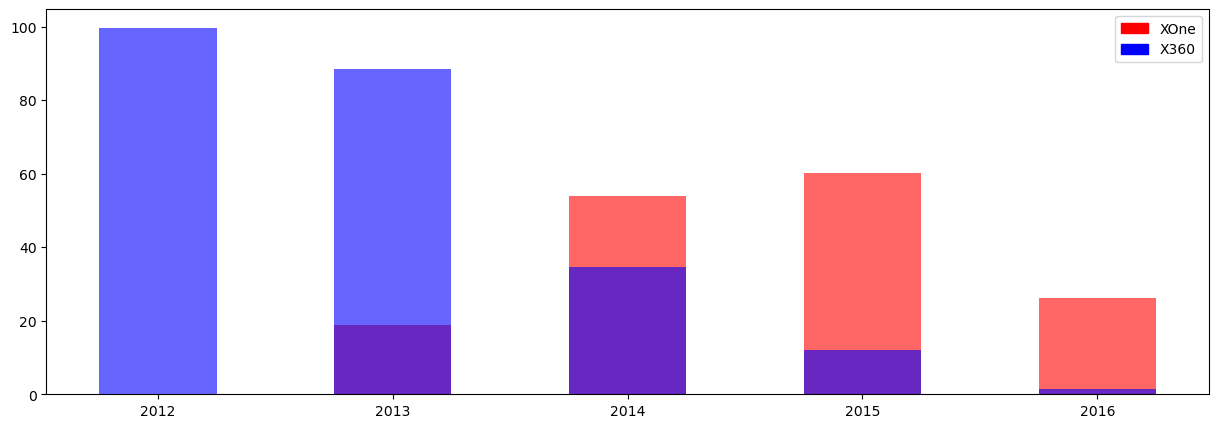

In [31]:
height_xone = []
height_x360 = []
for year in [i for i in range(2012, 2017)]:
    try:
        height_xone.append(data[data['platform'] == 'XOne'].groupby('year_of_release')['total_sales'].sum()[year])
    except:
        height_xone.append(0)
    try:
        height_x360.append(data[data['platform'] == 'X360'].groupby('year_of_release')['total_sales'].sum()[year])
    except:
        height_x360.append(0)
plt.figure(figsize=(15, 5))
plt.bar([i for i in range(2012, 2017)], height_xone, width=0.5, color='r', alpha=0.6)
plt.bar([i for i in range(2012, 2017)], height_x360, width=0.5, color='b', alpha=0.6)
colors = {'XOne':'red', 'X360':'blue'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels);

        Заметно падение продаж игр на X360 после выхода платформы нового поколения. X360 нельзя назвать потенциально 
    прибыльной, а XOne можно.

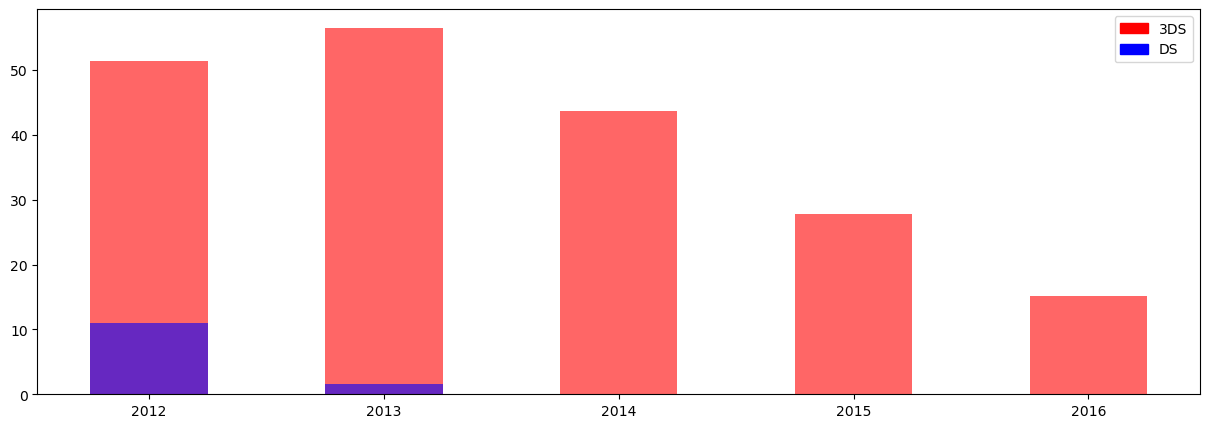

In [32]:
height_3ds = []
height_ds = []
for year in [i for i in range(2012, 2017)]:
    try:
        height_3ds.append(data[data['platform'] == '3DS'].groupby('year_of_release')['total_sales'].sum()[year])
    except:
        height_3ds.append(0)
    try:
        height_ds.append(data[data['platform'] == 'DS'].groupby('year_of_release')['total_sales'].sum()[year])
    except:
        height_ds.append(0)
plt.figure(figsize=(15, 5))
plt.bar([i for i in range(2012, 2017)], height_3ds, width=0.5, color='r', alpha=0.6)
plt.bar([i for i in range(2012, 2017)], height_ds, width=0.5, color='b', alpha=0.6)

colors = {'3DS':'red', 'DS':'blue'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels);

        Платформа DS не является потенциально прибыльной так, как продажи упали из-за появления платформы нового поколения.
    Платформа 3DS не является потенциально прибыльной из-за того, что продажи падают уже на протяжении 3 лет. 

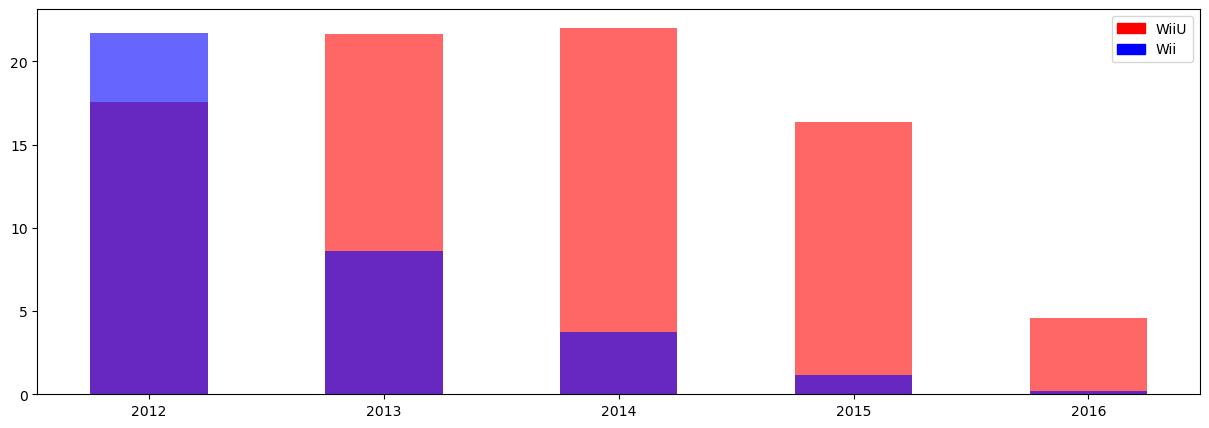

In [33]:
height_wiiu = []
height_wii = []
for year in [i for i in range(2012, 2017)]:
    try:
        height_wiiu.append(data[data['platform'] == 'WiiU'].groupby('year_of_release')['total_sales'].sum()[year])
    except:
        height_wiiu.append(0)
    try:
        height_wii.append(data[data['platform'] == 'Wii'].groupby('year_of_release')['total_sales'].sum()[year])
    except:
        height_wii.append(0)
plt.figure(figsize=(15, 5))
plt.bar([i for i in range(2012, 2017)], height_wiiu, width=0.5, color='r', alpha=0.6)
plt.bar([i for i in range(2012, 2017)], height_wii, width=0.5, color='b', alpha=0.6)

colors = {'WiiU':'red', 'Wii':'blue'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels);

        Обе платформы не являются потенциально прибыльными из-за снижения продаж игр на них.
        
        В итоге можно выделить несколько платформ, которые являются потенциально прибыльными:
        - PC
        - PS4
        - XOne

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
PS3,492.0,0.586951,1.464113,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


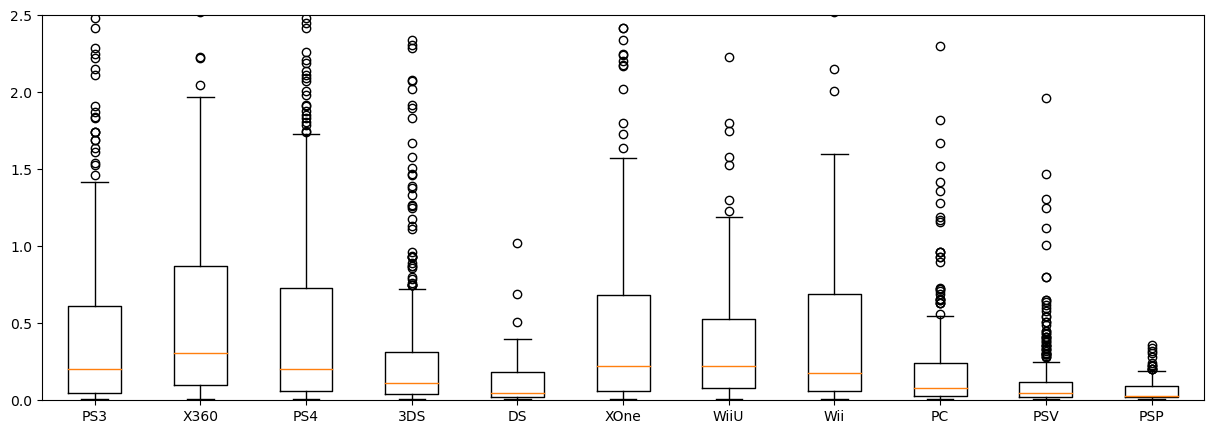

In [34]:
plt.figure(figsize=(15, 5))
plt.boxplot([data[data['platform'] == platform]['total_sales'] for platform in data['platform'].unique()])
plt.ylim(0, 2.5)
plt.xticks([i for i in range(1, 12)], [data['platform'].unique()[i] for i in range(0, 11)])
(data.groupby('platform')['total_sales']
     .describe()
     .sort_values(by='50%'))

<Axes: xlabel='platform', ylabel='total_sales'>

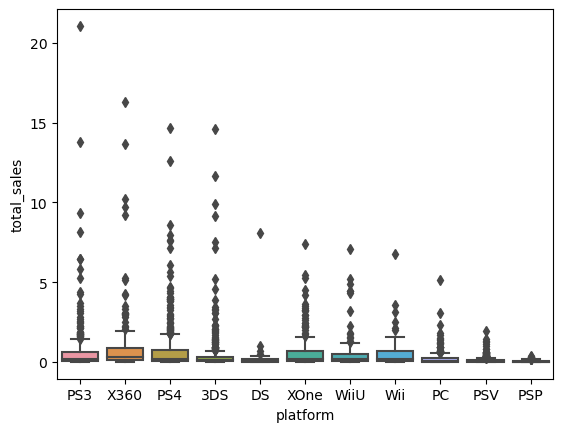

In [35]:
import seaborn as sns
sns.boxplot(data = data, y = 'total_sales', x='platform')

Доля игр с количеством проданных копий меньше 50 тысяч: 29%


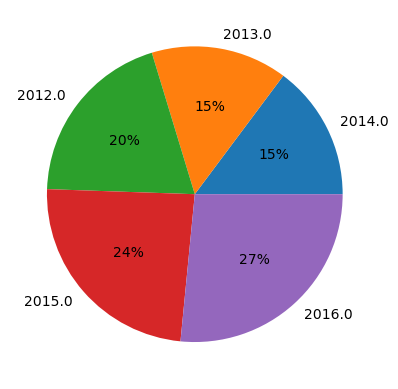

In [36]:
print('Доля игр с количеством проданных копий меньше 50 тысяч:',
       f"{(data[data['total_sales'] < 0.05]['name'].count() / data['name'].count()):0.0%}")
(data[data['total_sales'] < 0.05].groupby('year_of_release')['name']
                                 .count()
                                 .sort_values()
                                 .plot(kind='pie', 
                                       label="",
                                       autopct='%.0f%%'));

        При построении "ящиков с усами" заметно, что значительное количество лежит за пределами размаха, причем лежит выше. 
    Это связано с тем, что большое количество игр имеет очень маленькое количество продаж, 29% игр имеет количество 
    проданных копий меньше 50 тысяч. Причер половина из этих игр выпущены в 2015 или 2016, возможно это связано с тем, 
    что в эти года выпускается слишком большое количество игр и многие из них теряются среди других.
        Наблюдается очень большой размах значений квартилей для разных платформ: медианы лежат в промежутке от
    0,03 до 0,31, 1 квартиль в промежутке от 0.02 до 0.1, а 2 квартиль в промежутке от 0,09 до 0,87. 
        Все платформы можно разделить на 3 категории: с высоким, средним и низким значением медианы:
            - Низкие значения медиан у PSP, DS и PSV. Интересно, что DC выделяется среди них, имея довольно высокое значение
            среднего количества продаж, но при этом количество игр значительно ниже.
            - Средние значения медиан имеют следующие платформы: PC и 3DC.
            - Оставшиеся платформы имеют высокие значения медиан, среди них выделяется X360 с более высоким значением в 
            0,31.
        Размахи графиков тоже сильно отличаются, верхняя граница доходит почти до 2. 
        Все "коробки" для платформ по отдельности находятся в размахе графика для всех платформ. Минимальное нижнее значение
     среди всех "коробок" равно 0.02, максимальное - 0.87, а размах для всех платформ находится в промежутся от 0 и до
     значения, чуть больше 1. 
        Только у платформ PSP и PSV значения медиан и средние значения похожи, это означает, что для большинства игр на эти
     платформы продажи примерно равны. 

Доля игр с количеством проданных копий меньше 50 тысяч: 29%


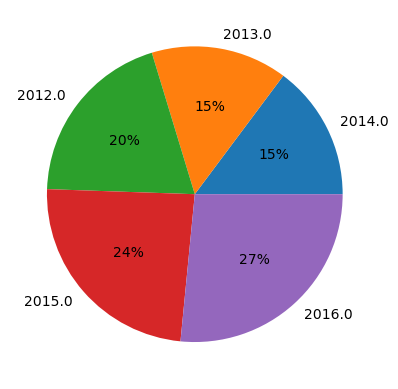

In [37]:
print('Доля игр с количеством проданных копий меньше 50 тысяч:',
       f"{(data[data['total_sales'] < 0.05]['name'].count() / data['name'].count()):0.0%}")
(data[data['total_sales'] < 0.05].groupby('year_of_release')['name']
                                 .count()
                                 .sort_values()
                                 .plot(kind='pie', 
                                       label="",
                                       autopct='%.0f%%'));

#### Поиск зависимости продаж от оценок критиков и пользователей

        Для изучени зависимости продаж игр от оценок критиков и пользователей построим диагррмы рассеяния и посчитаем 
    корреляцию для 3 потенциально прибыльных платформ и сравним результаты.

Коэффициент корреляции оценки критиков и глобальных продаж:  0.42
Коэффициент корреляции оценки пользователей и глобальных продаж:  -0.069


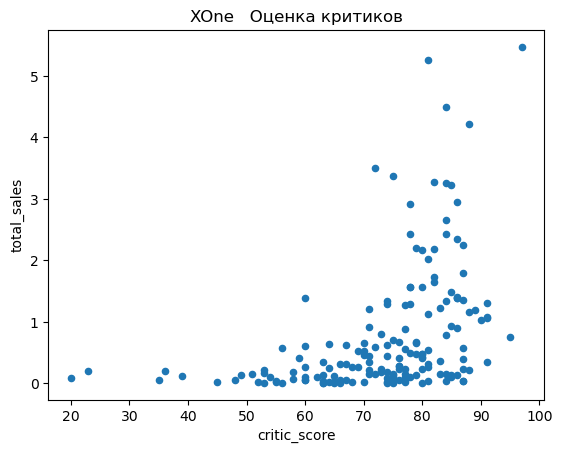

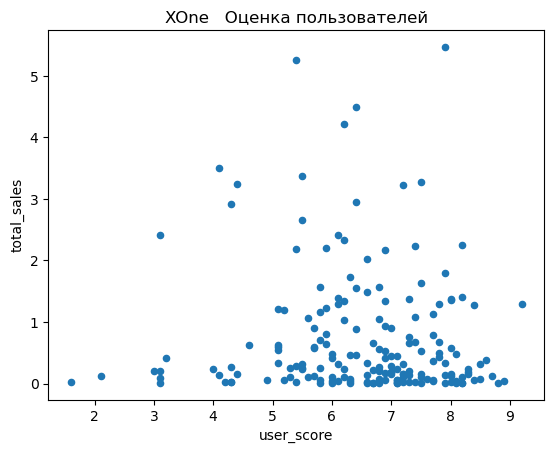

In [38]:
data[data['platform'] == 'XOne'].plot(kind='scatter', x='critic_score', y='total_sales', title='XOne   Оценка критиков');
data[data['platform'] == 'XOne'].plot(kind='scatter', x='user_score', y='total_sales', title='XOne   Оценка пользователей');
print('Коэффициент корреляции оценки критиков и глобальных продаж: ', 
     f"{data[data['platform'] == 'XOne']['total_sales'].corr(data[data['platform'] == 'XOne']['critic_score']):0.2}")
print('Коэффициент корреляции оценки пользователей и глобальных продаж: ', 
     f"{data[data['platform'] == 'XOne']['total_sales'].corr(data[data['platform'] == 'XOne']['user_score']):0.2}")

Коэффициент корреляции оценки критиков и глобальных продаж:  0.41
Коэффициент корреляции оценки пользователей и глобальных продаж:  -0.032


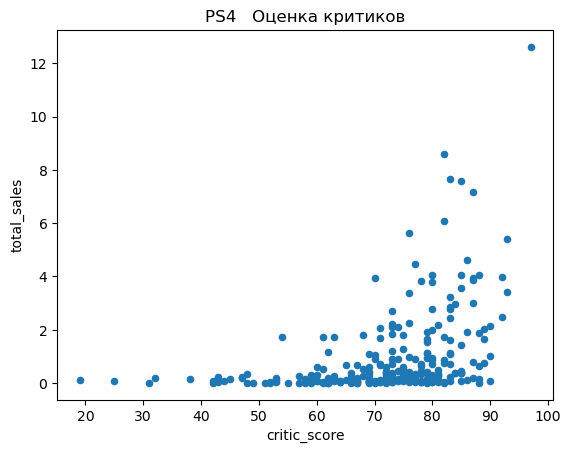

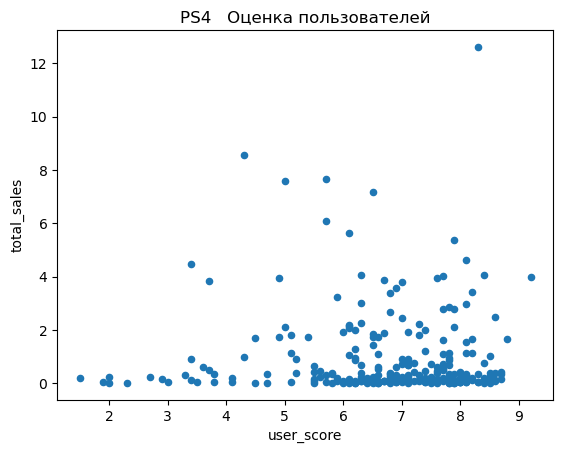

In [39]:
data[data['platform'] == 'PS4'].plot(kind='scatter', x='critic_score', y='total_sales', title='PS4   Оценка критиков');
data[data['platform'] == 'PS4'].plot(kind='scatter', x='user_score', y='total_sales', title='PS4   Оценка пользователей');
print('Коэффициент корреляции оценки критиков и глобальных продаж: ', 
     f"{data[data['platform'] == 'PS4']['total_sales'].corr(data[data['platform'] == 'PS4']['critic_score']):0.2}")
print('Коэффициент корреляции оценки пользователей и глобальных продаж: ', 
     f"{data[data['platform'] == 'PS4']['total_sales'].corr(data[data['platform'] == 'PS4']['user_score']):0.2}")

Коэффициент корреляции оценки критиков и глобальных продаж:  0.24
Коэффициент корреляции оценки пользователей и глобальных продаж:  -0.12


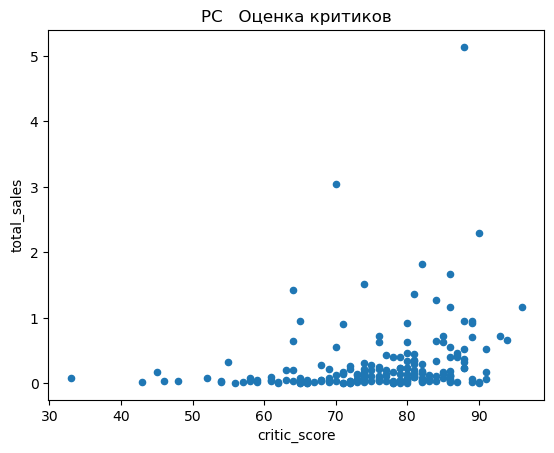

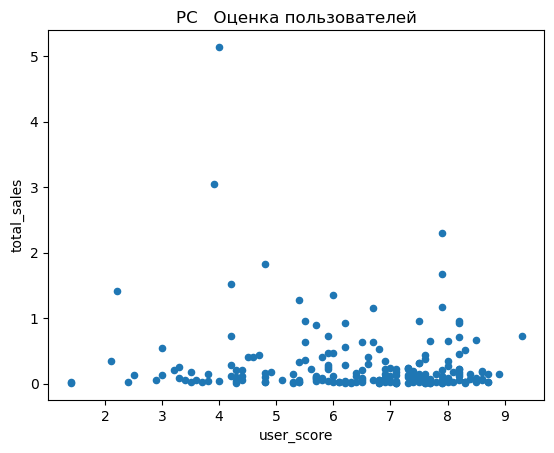

In [40]:
data[data['platform'] == 'PC'].plot(kind='scatter', x='critic_score', y='total_sales', title='PC   Оценка критиков');
data[data['platform'] == 'PC'].plot(kind='scatter', x='user_score', y='total_sales', title='PC   Оценка пользователей');
print('Коэффициент корреляции оценки критиков и глобальных продаж: ', 
     f"{data[data['platform'] == 'PC']['total_sales'].corr(data[data['platform'] == 'PC']['critic_score']):0.2}")
print('Коэффициент корреляции оценки пользователей и глобальных продаж: ', 
     f"{data[data['platform'] == 'PC']['total_sales'].corr(data[data['platform'] == 'PC']['user_score']):0.2}")

        Результат для платформ XOne и PS4 ситуация похожая - есть зависимость количества проданных копий от оценки критиков,
    но эта зависимость не очень сильная, коэффициент корреляции равен 0.41-0.42, зависимости между количеством проданных
    копий и оценками пользователей нет. На платформе PC зависимость между количеством проданных копий и оценками критиков и
    пользователей очень слабая. 
        XOne и PS4 отличается от PC тем, что это игровые консоли, скорее всего у остальных платформ ситуация будет похожа на
    ситуацию с XOne и PS4, чтоб это проверить необходимо посчитать коэффициент корреляции для всех оставшихся платформ.

In [41]:
corr_table = data.pivot_table(index = 'platform', values=['total_sales', 'critic_score', 'user_score'], aggfunc='corr')
corr_table = corr_table[corr_table.index.get_level_values(1) == 'total_sales']
corr_table.insert(0, 'platform', corr_table.index.get_level_values(0))
corr_table = corr_table[['platform', 'critic_score', 'user_score']]
corr_table.columns = ['platform', 'critic_score_corr', 'user_score_corr']
corr_table.sort_values(by='critic_score_corr').reset_index(drop=True)

,platform,critic_score_corr,user_score_corr
0,Wii,-0.424341,0.296197
1,PSV,0.094488,-0.004339
2,PC,0.237243,-0.121867
3,3DS,0.320803,0.197583
4,PS3,0.334152,-0.006206
5,WiiU,0.348380,0.400219
6,X360,0.360573,0.006164
7,PS4,0.406568,-0.031957
8,XOne,0.416998,-0.068925
9,DS,NaN,0.882709


        Для платформ 3DS, PS3, X360 ожидания подтвердились, на платформе WiiU количество продаж также имеет зависимость от 
    оценок пользователей. На платформе PSV количество продаж не зависит ни от оценок критиков, ни от оценок пользователей.
    На платформе Wii количество продаж имеет обратную зависимость с оценками критиков и не имеет зависимости с оценками
    пользователей. На платформах DS и PSP не удалось посчитать коэффициент корреляции количества продаж и оценки критиков,
    а с оценками пользователей количество продаж имеет сильную зависимость и сильную обратную зависимость соответстветвенно.
#### Анализ распределения игр по жанрам

In [42]:
((data.pivot_table(index='genre',
                 values='total_sales',
                 aggfunc=['mean', 'sum', 'count']))
                .sort_values(by=('mean', 'total_sales'), ascending=False))

,mean,sum,count
,total_sales,total_sales,total_sales
genre,,,
Shooter,1.296723,304.73,235
Platform,0.717647,61.00,85
Sports,0.678127,181.06,267
Role-Playing,0.521081,192.80,370
Racing,0.465217,53.50,115
Misc,0.442917,85.04,192
Simulation,0.439000,35.12,80
Action,0.427856,441.12,1031


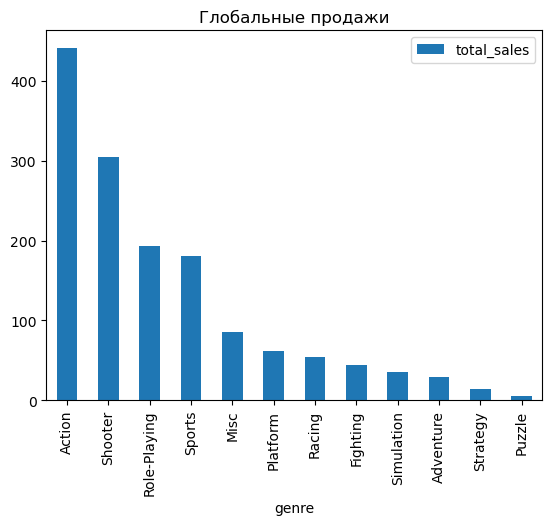

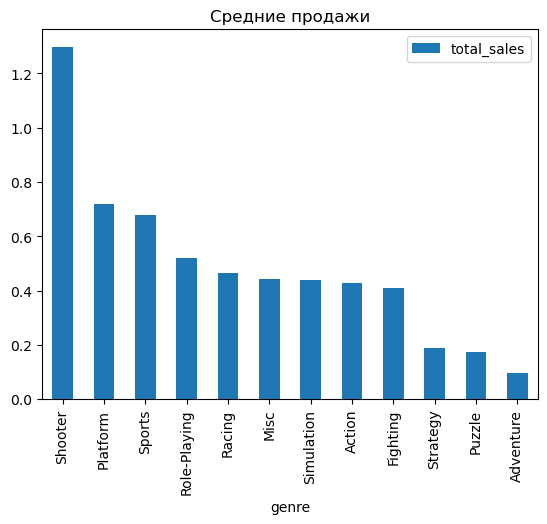

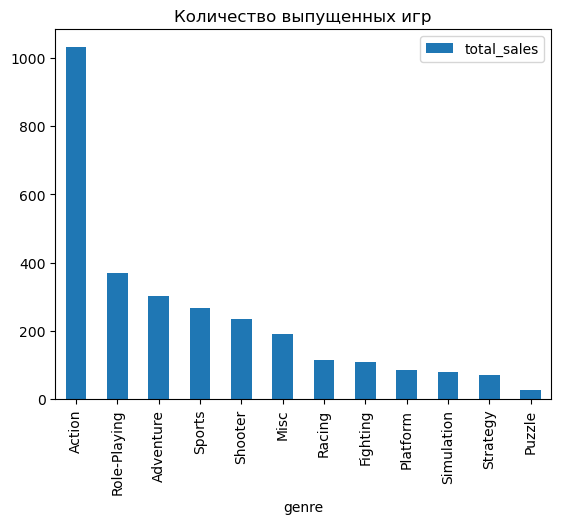

In [43]:
((data.pivot_table(index='genre',
                 values='total_sales',
                 aggfunc='sum'))
                 .sort_values(by='total_sales', ascending=False).plot(kind='bar', title='Глобальные продажи'));
((data.pivot_table(index='genre',
                 values='total_sales',
                 aggfunc='mean'))
                 .sort_values(by='total_sales', ascending=False).plot(kind='bar', title='Средние продажи'));
((data.pivot_table(index='genre',
                 values='total_sales',
                 aggfunc='count'))
                 .sort_values(by='total_sales', ascending=False).plot(kind='bar', title='Количество выпущенных игр'));

In [44]:
action_share = data[data['genre'] == 'Action']['name'].count() / data['name'].count()
print(f'Процент игр жанра экшен: {action_share:0.1%}')

Процент игр жанра экшен: 35.7%


        Среди всех явно выделяются игры с жанром экшен, но несмотря на большое количество продаж, этот жанр нельзя назвать
    прибыльным, так как такие продажи связаны с количеством выпущенных игр. 35.7% всех игр имеет жанр экшен, при этом по
    среднему значению продаж этот жанр находится на 8 месте.
        По средним продажам выделяются игры жанра шутер, жанр находится на первом месте по средним продажам и опережает 
    почти в два раза следующий. Также выделяются жанры Sports, Role-Playing и Platform, однако количество 
    платформеров значительно меньше, поэтому по глобальным продажам этот жанр не находится в топе.
        Также выделяются наименее популярные жанры - стратегия, пазлы и приключения, они имеют наихудшие средние продажи. 
        В итоге можно сказать, что самый прибыльные жанры - шутер, спортивные игры, ролевые и платформеры. Наименее 
    прибыльные жанры - стратегия, пазлы, приключения.
## Шаг 4.  Составление портрета пользователя каждого региона
### Изучение популярных жанров и платформ по регионам

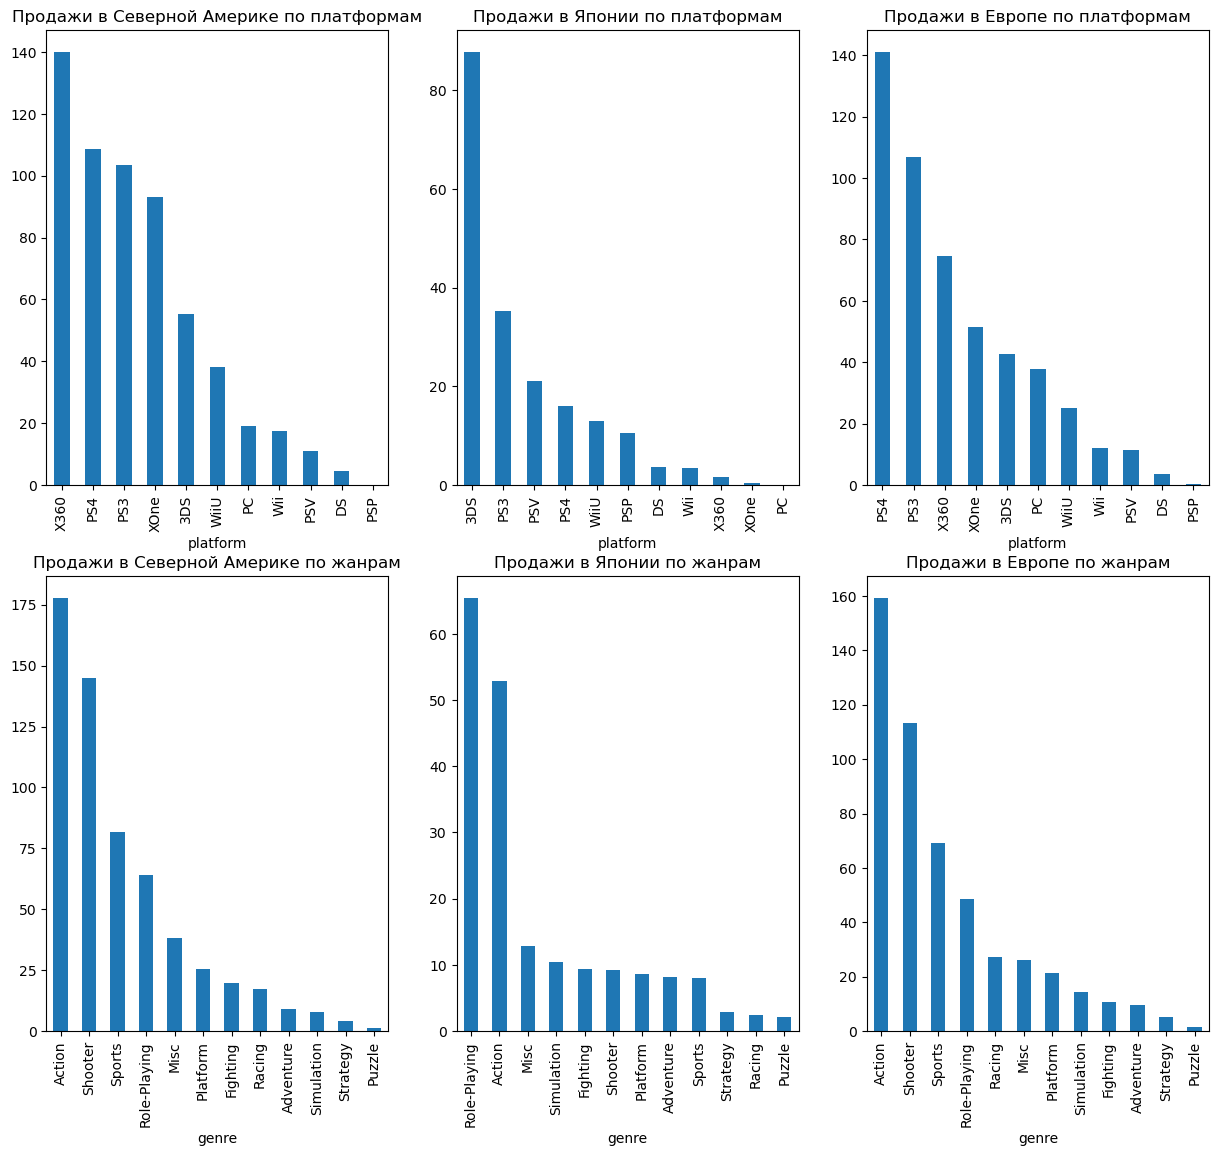

In [45]:
#Распределение продаж в разных регионах по платформам и жанрам
plt.subplot(2, 3, 1)
(data.groupby('platform')['na_sales']
     .sum()
     .sort_values(ascending=False)
     .plot(kind='bar',
           title='Продажи в Северной Америке по платформам',
           figsize=(15, 13)));
plt.subplot(2, 3, 2)
(data.groupby('platform')['jp_sales']
     .sum()
     .sort_values(ascending=False)
     .plot(kind='bar',
           title='Продажи в Японии по платформам'));
plt.subplot(2, 3, 3)
(data.groupby('platform')['eu_sales']
     .sum()
     .sort_values(ascending=False)
     .plot(kind='bar',
           title='Продажи в Европе по платформам'));
plt.subplot(2, 3, 4)
(data.groupby('genre')['na_sales']
     .sum()
     .sort_values(ascending=False)
     .plot(kind='bar',
           title='Продажи в Северной Америке по жанрам'));
plt.subplot(2, 3, 5)
(data.groupby('genre')['jp_sales']
     .sum()
     .sort_values(ascending=False)
     .plot(kind='bar',
           title='Продажи в Японии по жанрам'));
plt.subplot(2, 3, 6)
(data.groupby('genre')['eu_sales']
     .sum()
     .sort_values(ascending=False)
     .plot(kind='bar',
           title='Продажи в Европе по жанрам'));

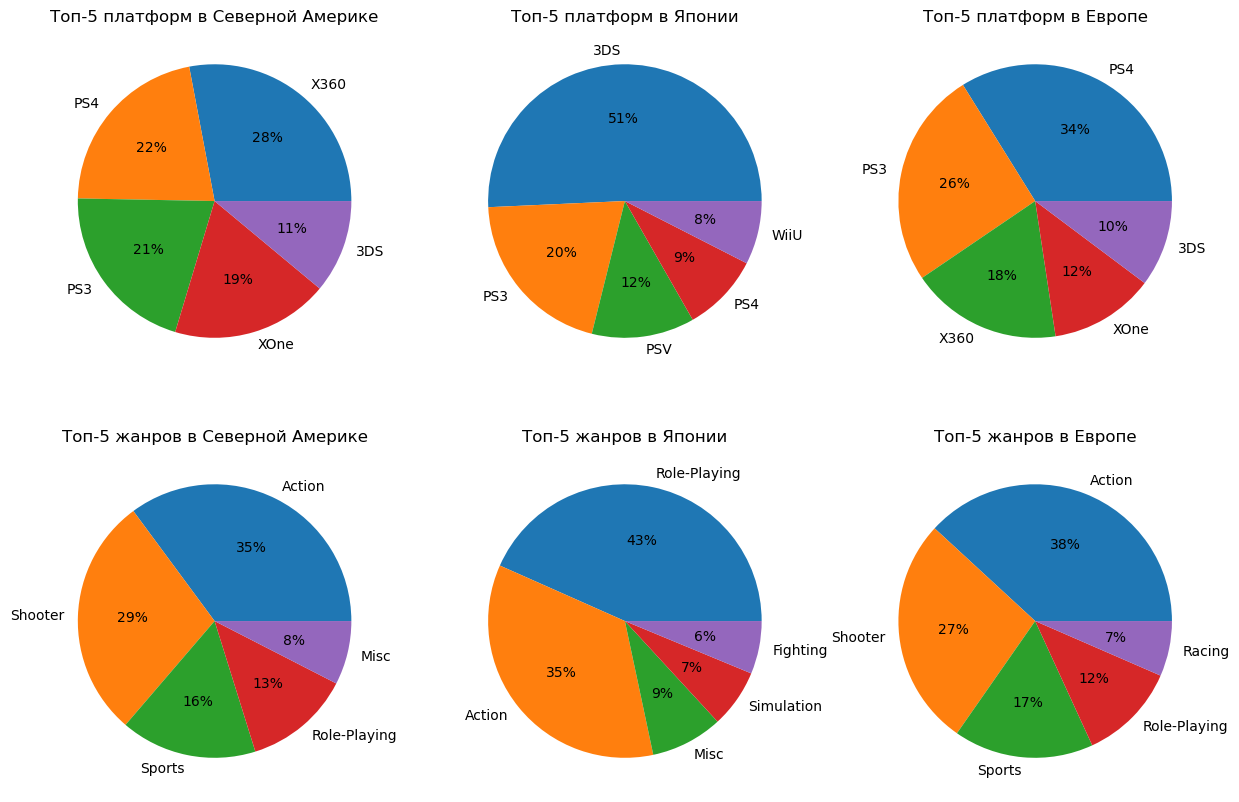

In [46]:
#Топ-5 жанров и платформ по регионам
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
(data.groupby('platform')['na_sales']
     .sum()
     .sort_values(ascending=False)[0:5]
     .plot(kind='pie',
           title='Топ-5 платформ в Северной Америке',
           label=(""),
           autopct='%.0f%%'));
plt.subplot(2, 3, 2)
(data.groupby('platform')['jp_sales']
     .sum()
     .sort_values(ascending=False)[0:5]
     .plot(kind='pie',
           title='Топ-5 платформ в Японии',
           label=(""),
           autopct='%.0f%%'));
plt.subplot(2, 3, 3)
(data.groupby('platform')['eu_sales']
     .sum()
     .sort_values(ascending=False)[0:5]
     .plot(kind='pie',
           title='Топ-5 платформ в Европе',
           label=(""),
           autopct='%.0f%%'));
plt.subplot(2, 3, 4)
(data.groupby('genre')['na_sales']
     .sum()
     .sort_values(ascending=False)[0:5]
     .plot(kind='pie',
           title='Топ-5 жанров в Северной Америке',
           label=(""),
           autopct='%.0f%%'));
plt.subplot(2, 3, 5)
(data.groupby('genre')['jp_sales']
     .sum()
     .sort_values(ascending=False)[0:5]
     .plot(kind='pie',
           title='Топ-5 жанров в Японии',
           label=(""),
           autopct='%.0f%%'));
plt.subplot(2, 3, 6)
(data.groupby('genre')['eu_sales']
     .sum()
     .sort_values(ascending=False)[0:5]
     .plot(kind='pie',
           title='Топ-5 жанров в Европе',
           label=(""),
           autopct='%.0f%%'));

        Топ-5 приставок в Японии отличается больше всего, в него входят только приставки двух японских компаний Sony и
    Nintendo. Отличие в топ-5 платформ Северной Америки и Европы лишь в том, что в Северной Америке больше распространена
    платформа X360, состав топов идентичен. 
        Топ-5 жанров в Северной Америке от топ-5 жанров в Европе отличается только пятым элементом: в Северной Америке на
    пятом месте жанр misc, в Европе - racing. В Японии топ значительно отличается, главное отличие - на первом месте не
    жанр экшен, а жанр ролевых игр, это связано с тем, что в Японии очень сильно распространенно RPG игры, среди игр 
    данного жанра даже выделяется JRPG игры - Japanese Role-Playing Game. 
        Игры жанра экшен находятся во всех трех топах, игры жанра шутер находят в топах Северной Америке и Европы, занимая в
    них второе место, а в Японии шутеры не так распространены.

### Изучение влияния рейтинга ESRB по регионам

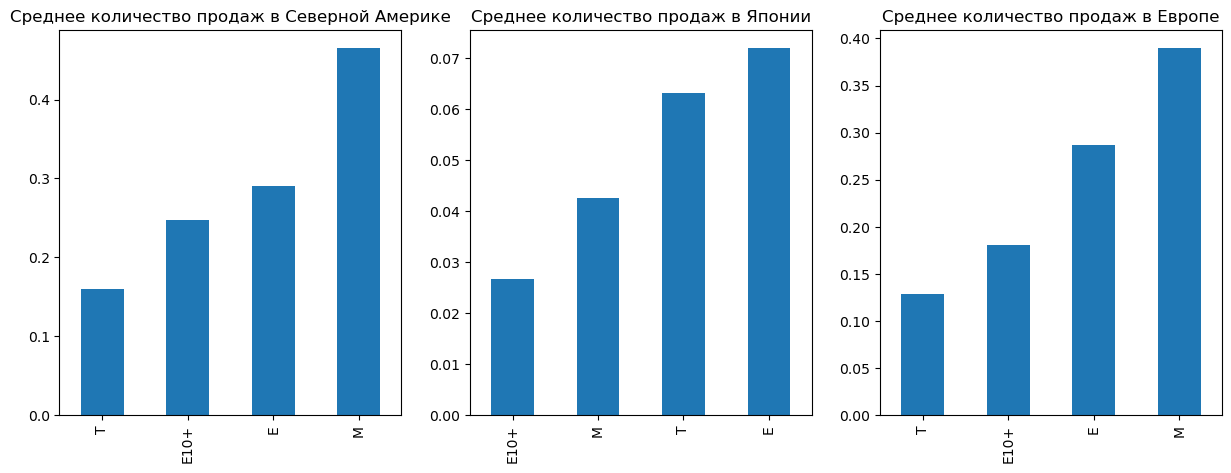

In [47]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
(data.groupby('rating')['na_sales']
     .mean()
     .sort_values()
     .plot(kind='bar', 
           xlabel="", 
           title="Среднее количество продаж в Северной Америке"));
plt.subplot(1, 3, 2)
(data.groupby('rating')['jp_sales']
     .mean()
     .sort_values()
     .plot(kind='bar', 
           xlabel="", 
           title="Среднее количество продаж в Японии"));
plt.subplot(1, 3, 3)
(data.groupby('rating')['eu_sales']
     .mean()
     .sort_values()
     .plot(kind='bar',
           xlabel="",
           title="Среднее количество продаж в Европе"));

        На всех графиках видна зависимость количества продаж от рейтинга ESRB. Распределение количества продаж по рейтингам 
    в Северной Америке и Европе идентично, в Японии распределение отличается.
##  Шаг 5. Проверка гипотез

        Первая гипотеза, которую необходимо проверить: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    Нулевая гипотеза: оценки пользователей на платформе Xbox One равны оценкам пользователей на платформе PC. 
    Альтернативная: оценки пользователей не равны. Для проверки гипотезы будет использоваться метод для проверки гипотезы о
    равенстве среднего двух генеральных совокупностей по взятым из них выборкам: ttest_ind(). Пороговое значение alpha
    равно 0,05. 

In [48]:
result = st.ttest_ind(
    data[data['platform'] == 'PC']['user_score'].dropna(),
    data[data['platform'] == 'XOne']['user_score'].dropna(),
    alternative='two-sided')

print(f"P-value равно: {result.pvalue:0.2}")

if result.pvalue < 0.05:
    print('Отвергаем нулевую теорию, средние оценки пользователей на Xbox One и PC не равны.')
else:
    print("""Нет оснований опровергать нулевую гипотезу, скорее всего средние оценки пользователей платформ Xbox One и PC 
действительно равны.""")

P-value равно: 0.55
Нет оснований опровергать нулевую гипотезу, скорее всего средние оценки пользователей платформ Xbox One и PC 
действительно равны.


        Вторая гипотеза, которую необходимо проверить: средние пользовательские рейтинги жанров Action и Sports разные.
    Нулевая гипотеза: оценки пользователей жанра Action равны оценкам пользователей жанра Sports. 
    Альтернативная: оценки пользователей не равны. Для проверки гипотезы будет использоваться метод для проверки гипотезы о
    равенстве среднего двух генеральных совокупностей по взятым из них выборкам: ttest_ind(). Пороговое значение alpha
    равно 0,05. 

In [49]:
result = st.ttest_ind(
    data[data['genre'] == 'Sports']['user_score'].dropna(),
    data[data['genre'] == 'Action']['user_score'].dropna(),
    alternative='two-sided')

print(f"P-value равно: {result.pvalue:0.2}")

if result.pvalue < 0.05:
    print('Отвергаем нулевую теорию, средние оценки пользователей жанров Action и Sports скорее всего разные.')
else:
    print('Нет оснований опровергать нулевую гипотезу')

P-value равно: 4.8e-26
Отвергаем нулевую теорию, средние оценки пользователей жанров Action и Sports скорее всего разные.


        Изучим также, какой из жанров имеет большую среднюю оценку от пользователей, для этого в качестве альтернативной
    гипотезы необходимо взять, что жанр Sports имеет меньшую среднюю оценку, чем жанр Action. Остальные параметры остаются
    прежними.

In [50]:
result = st.ttest_ind(
    data[data['genre'] == 'Sports']['user_score'].dropna(),
    data[data['genre'] == 'Action']['user_score'].dropna(),
    alternative='less')

print(f"P-value равно: {result.pvalue:0.2}")

if result.pvalue < 0.05:
    print('Отвергаем нулевую теорию, средние оценки пользователей жанра Action выше оценок пользователей жанра Sports.')
else:
    print('Нет оснований опровергать нулевую гипотезу')

P-value равно: 2.4e-26
Отвергаем нулевую теорию, средние оценки пользователей жанра Action выше оценок пользователей жанра Sports.


        В результате проверки двух гипотез получили следующие результаты. Средние оценки пользователей платформ Xbox One и 
    PC действительно равны, а средние оценки пользователей в жанрах Action и Sports не равны, у жанра Action средняя оценка
    выше, чем у жанра Sports.
## Шаг 6. Итоговый вывод
### Предобработка данных:
        - Был считан CSV-файл, данные записаны в переменную data;
        - Дубликаты не были обнаружен;
        - Были обнаружены пропуски в данных, удалены строки с пропусками в столбцах 'name', 'genre' и 'year_of_release';
        - Пропуски в столбцах 'critic_score', 'user_score' и 'rating' оставлены в таблице; 
        - Выявлено, что пропуски в столбцах 'critic_score', 'user_score' и 'rating' зависят от года выпуска игры, игры,
        выпущенные до 2001 года почти не имеют рейтингов и оценок;
        - В столбце user_score значение 'tbd', которое означает, что оценка не определена, было заменено на None;
        - Изменен тип данных на float в столбце user_score.
### Анализ и обработка данных:
        - Выявлено, что основная масса игр выпускалась в период 2001 - 2016;
        - Выделяются 6 наиболее популярных платформ: PS, DS, Wii, PS3, X360 и PS2;
        - Построено распределение продаж игр на наиболее популярные платформы по годам и выявлено, что период "жизни"
        платформы около 6 лет, после этого ее заменяют более новые платформы. Исходя из этой информации было принято
        решение анализировать только игры, которые были выпущены в последние 6 лет, так как остальные не имеют значения
        для планирования на следующий год;
        - Среди платформ, на которые выпускались игры в последние 6 лет, выявлено 3 потенциально прибыльные: PC, PS4 И XOne;
        - Изучена зависимость количества проданных копий от оценки критиков и оценки пользователей для каждой платформы,
        ниже приведена таблица коэффициентов корреляции;

| Платформа | Коэффициента корреляции оценки критиков | Коэффициента корреляции оценки пользователей |
| --- | --- | --- |
| Wii | -0.42 | 0.05 | 
| PSV | 0.09 | 0.00 | 
| PC | 0.24 | -0.12 | 
| 3DS | 0.32 | 0.20 | 
| PS3 | 0.33 | -0.01 | 
| WiiU | 0.35 | 0.40 | 
| X360 | 0.36 | 0.01 | 
| PS4 | 0.41 | -0.03 | 
| XOne | 0.42 | -0.07 | 
| DS | NaN | 0.59 | 
| PSP | NaN | -0.81 |

        - Изучено распределение игр по платформам, наиболее популярные жанры - шутер, спортивные игры, ролевые игры и
        платформеры, наименее - стратегия, пазлы и приключения;
        - Проанализированы самые популярные жанры и платформы по регионам, ниже представлены два топ-5 платформ и жанров;

| Северная Америка | Европа | Япония |
| --- | --- | --- |
| X360 | PS4 | 3DS |
| PS4 | PS3 | PS3 |
| PS3 | X360 | PSV | 
| XOne | XOne | PS4 |
| 3DS | 3DS | WiiU |

| Северная Америка | Европа | Япония |
| --- | --- | --- |
| Action | Action | Role-Playing |
| Shooter | Shooter | Action |
| Sports | Sports | Misc | 
| Role-Playing | Role-Playing | Simulation |
| Misc | Racing | Fighting |

        - Выявлена зависимость количества проданных игр от рейтинга ESRB по регионам. В Северной Америке и Европе
        игры с рейтингом M наиболее продаваемые, с рейтингом T - наименее. В Японии игры с рейтингами E и E10+ наиболее и 
        наименее популярные соответственно.
### Проверка гипотез:
        - Проверена гипотеза о равенстве средних пользовательских рейтингов на платформах Xbox One и PC. Выявлено, что
        средние пользовательские рейтинги на этих платформах действительно равны.
        - Проверена гипотеза о неравенстве средних пользовательских оценок у жанров Action и Sports. Выявлено, что
        средние пользовательские рейтнги у этих двух жанров действительно не равны, также выявлено, что игры жанра Action
        имеют более высокие оценки, чем игры жанра Sports.